# Проект урока 6. Оконные функции и интерактивные графики
#  «Анализ средних цен на авокадо»

## Шаг 1

Представьте, что вы — аналитик в агентстве, специализирующемся на изучении рынка продуктов питания. Вам поручено исследовать тренды цен на авокадо и проанализировать средние значения. Для этого у вас есть данные от Hass Avocado Board:

- Date — дата  
- AveragePrice — средняя цена одного авокадо  
- Total Volume — количество проданных авокадо  
- 4046 — количество проданных авокадо PLU 4046 (PLU — код товара, Product Lookup code)  
- 4225 — количество проданных авокадо PLU 4225  
- 4770 — количество проданных авокадо PLU 4770  
- Total Bags — всего упаковок  
- Small Bags — маленькие упаковки  
- Large Bags — большие  
- XLarge Bags — очень большие  
- type — обычный или органический  
- year — год  
- Region — город или регион the city or region of the observation  

В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. 

Вы можете решать задания тем способом, который считаете наиболее удобным или оптимальным. А для того, чтобы лучше понять задание, следуйте по шагам выполнения. Бывает, что их можно выполнить в одну строчку, применяя методы друг за другом. А если выполняете шаги отдельно, не забудьте сохранить результат в переменную, чтобы на следующем шаге работать именно с ней.

В ноутбуке место для вашего решения обозначено комментарием `# Ваш код здесь`, но вы можете писать код там, где вам удобно, добавлять или удалять ячейки с кодом или текстом по вашему усмотрению.

Кроме того можно посмотреть подсказки, кликнув на строчку `► Нажмите сюда, чтобы увидеть подсказку`. Также не забывайте о наличии конспектов и возможности задать вопрос в Discord, ссылка на нужный тред есть на странице каждого шага в LMS

## Шаг 2

Для начала нас будут интересовать общие данные, без разбивки по типам авокадо и регионам. Прочитайте данные и сохраните датафрейм в переменную `avocado_full`. **Для каждой даты посчитайте усредненное значение средних цен на авокадо (см.колонку `AveragePrice`).** Сохраните результат в переменную `avocado_mean`.

**Какое усредненное значение цены получилось в первой строчке, за 4 января 2015 года?** Округлять результат не нужно. В качестве разделителя дробной части используйте точку.

In [71]:
import pandas as pd

In [72]:
avocado_full = pd.read_csv('avocado_full.csv', parse_dates=['Date'])

In [73]:
avocado_full


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
18245,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18246,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
18247,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [74]:
avocado_mean = avocado_full\
    .groupby('Date')\
    .AveragePrice.mean()

avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

## Шаг 3

Перед тем, как приступить к подсчету скользящего среднего, убедитесь, что вы знаете параметры метода `rolling`, представленные в [документации pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html). Установите соответствие между каждым параметром и его описанием.

## Шаг 4

**Теперь на полученных во втором шаге данных посчитайте скользящее среднее цены авокадо, с окном равным 3. Чему равно максимальное значение?** Ответ округлите до двух знаков после точки.

In [75]:
avocado_mean.rolling(window=3).mean().max()

1.8493209876543206

## Шаг 5

Исследуйте, как размер окна влияет на сглаживание значения. **Постройте линейные графики и посмотрите, как изменится линия в зависимости от выбранного размера окна (2, 4, 10, 50). Соотнесите эти картинки с соответствующим значением размера окна:**

![](https://ucarecdn.com/c24cc8c4-4596-4d71-a6ca-b5ad8ac3cd6f/)

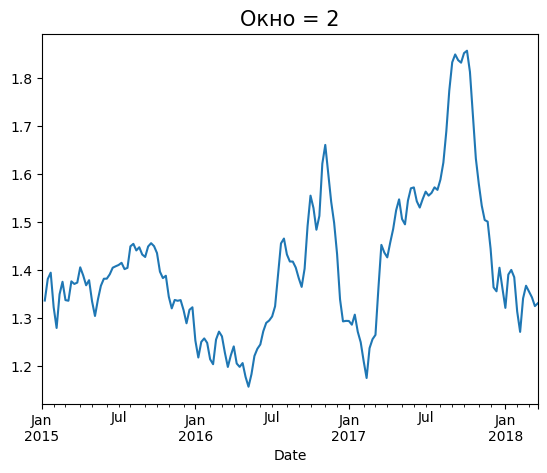

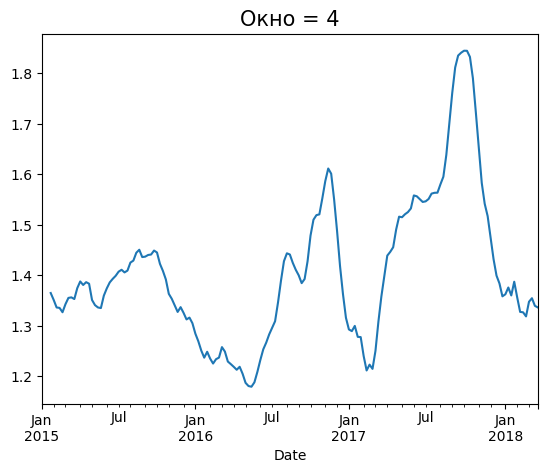

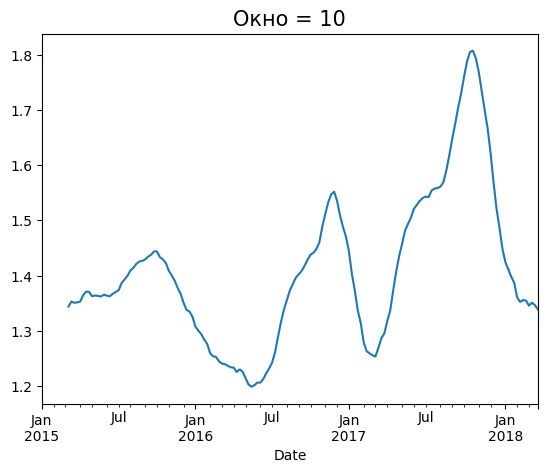

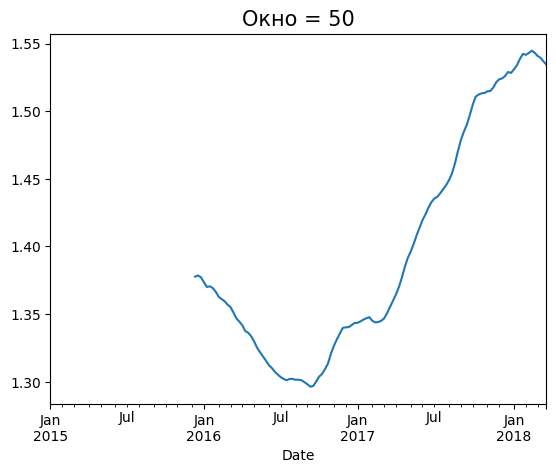

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

windows = [2, 4, 10, 50]

for el in windows:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(f'Окно = {el}', fontsize=15)
    res = avocado_mean.rolling(window=el).mean()
    res.plot()
    plt.show()
    


## Шаг 6

**Теперь посчитайте экспоненциальное скользящее среднее.** Используйте данные в переменной `avocado_mean` и метод `ewm()` с параметром `span`, равным 2. Результат запишите в переменную `avocado_ewm`.

**На LMS уже создана переменная `avocado_mean`. Загрузите в LMS ваш код, в котором сохраняете в переменную `avocado_ewm` расчет экспоненциального скользящего среднего**

In [77]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

## Шаг 7

Теперь вернемся к изначальным данным из датафрейма `avocado_full`. Для органических авокадо (см.колонку `type`) в Чикаго (см.колонку `region`) посчитайте скользящее среднее с окном 4. Числа округлите до трех знаков после точки. На основе получившихся данных постройте интерактивный линейный график, чтобы было удобно заполнить пропуски:

*При подсчете скользящего среднего средняя цена за авокадо 21 августа 2016 года была равна ..., 19 февраля 2017 её значение было равно ...*

In [91]:
organic_ch = avocado_full.query('type == "organic" and region == "Chicago"')
organic_ch

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
153,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
293,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
343,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
537,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17785,2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
17897,2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
17984,2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago
18075,2018-03-18,1.66,35542.17,184.53,26955.74,0.0,8401.90,8398.57,3.33,0.0,organic,2018,Chicago


In [93]:
res = organic_ch.set_index('Date')
res


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago


In [94]:
res = organic_ch.AveragePrice.rolling(window=4).mean().round(3)
res


1          NaN
153        NaN
293        NaN
343      1.730
537      1.737
         ...  
17785    1.652
17897    1.652
17984    1.655
18075    1.655
18151    1.657
Name: AveragePrice, Length: 169, dtype: float64

In [81]:
!pip install plotly
import plotly.express as px

In [95]:
px.line(res)

## Шаг 8

Для ещё большего обобщения информации, чем подсчет скользящих значений, можно использовать разделение значений на группы, интервалы. **С помощью функции `cut()` из библиотеки `pandas` разбейте средние цены (см.колонку `AveragePrice` в датафрейме `organic_ch` с прошлого шага с записями только об органических авокадо в Чикаго) на две группы: те, что больше общего среднего значения по всем этим ценам и те, что не больше (то есть средняя цена будет меньше или равна общему среднему). Определите, каких цен больше.** Для этого:  
1) Выведите описательную статистику для колонки со средним ценами и определите минимальное, среднее и максимальное значения.  
2) Вместо минимального, возьмите значение, которое будет ниже минимального (насколько ниже — не важно).  
3) Сохраните три значения (ниже минимального, среднее и максимальное) в таком же порядке в список `bins` (это будут три границы для двух групп цен (левая граница не включается в группу, а правая включается).  
4) Запишите в список `labels` две строки с названиями групп в таком порядке: `меньше или равно среднему` и `больше среднего`.  
5) Используя подготовленные списки `bins` и `labels`, с помощью функции `pd.cut()` разбейте значения в колонке `AveragePrice` датафрейма `organic_ch` на группы — и сохраните результат в новую колонку `AveragePrice_label` этого же датафрейма.  
6) Посчитайте, каких значений цен больше: тех, что `меньше или равно среднему`, или тех, что `больше среднего`.

In [96]:
desc = organic_ch.describe()
desc

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,169.000000,169.000000,169.000000,169.000000,169.0,169.000000,169.000000,169.000000,169.0,169.000000
mean,1.744201,31321.856509,408.501775,27524.999053,0.0,3388.190178,3372.943846,15.246331,0.0,2016.147929
std,0.225277,11695.293667,422.358983,11135.090846,0.0,3728.824929,3732.389546,148.619039,0.0,0.942709
min,1.080000,9910.840000,21.790000,5013.570000,0.0,33.330000,30.000000,0.000000,0.0,2015.000000
25%,1.600000,24460.460000,78.310000,21147.930000,0.0,580.000000,569.940000,0.000000,0.0,2015.000000
50%,1.680000,29892.840000,171.400000,26198.440000,0.0,2025.000000,1985.090000,0.000000,0.0,2016.000000
75%,1.920000,36774.580000,722.160000,32668.250000,0.0,4344.590000,4344.590000,3.330000,0.0,2017.000000
max,2.300000,88346.470000,1720.140000,86707.640000,0.0,22340.770000,22340.770000,1928.610000,0.0,2018.000000


In [97]:
bins = [desc.AveragePrice['min'], desc.AveragePrice['mean'], desc.AveragePrice['max']]


In [98]:
labels = ['меньше или равно среднему', 'больше среднего']

In [99]:
organic_ch

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
153,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
293,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
343,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
537,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17785,2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
17897,2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
17984,2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago
18075,2018-03-18,1.66,35542.17,184.53,26955.74,0.0,8401.90,8398.57,3.33,0.0,organic,2018,Chicago


In [100]:
organic_ch['AveragePrice_label'] = pd.cut(organic_ch['AveragePrice'] , bins=bins, labels=labels)


c:\users\elnur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
organic_ch.AveragePrice_label.value_counts()

меньше или равно среднему    94
больше среднего              74
Name: AveragePrice_label, dtype: int64

## Итоги

В этом уроке вы исследовали тренды цен на авокадо и проанализировали средние значения, используя оконные функции (скользящее среднее и экспоненциальное скользящее среднее) и интерактивные графики, а также потренировались преобразовывать числовую переменную в категориальную, чтобы поделить значения на группы